# Environment setting

In [1]:
# move to source directory
%pwd
%cd ../src
%pwd
%ls

/home/yh/git/kaggle_ieee-fraud-detection/src
__pycache__/  exp_0006_nroman_lgb.py*  feature_factory.py*  tests/
config/       exp_0007_nroman_lgb.py*  features/            transformer.py*
deprecated/   exp_0008_magic_xgb.py*   models/              utils/


In [21]:
# import major modules
import pandas as pd
import numpy as np
import sys
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
sys.stdout.flush()

In [49]:
# Import config
from utils.configure import Config
config_mod = 'config.config_0008'
c = Config()
c.import_config_module(config_mod)

# Read data

In [56]:
c.transformer

{'ROOTDIR': PosixPath('/home/yh/git/kaggle_ieee-fraud-detection'),
 'VERSION': '0008',
 'features': ['magic'],
 'DEBUG_SMALL_DATA': True,
 'out_train_path': PosixPath('/home/yh/git/kaggle_ieee-fraud-detection/data/processed/train_0008.pkl'),
 'out_test_path': PosixPath('/home/yh/git/kaggle_ieee-fraud-detection/data/processed/test_0008.pkl')}

In [51]:
log = pd.read_csv(c.log.train_log_path, delimiter='\t')
print(log.shape)
log.head()

(712, 4)


,fold,iteration,train_auc,eval_auc
0,1,10,0.754265,0.727488
1,1,20,0.804397,0.788073
2,1,30,0.820626,0.808447
3,1,40,0.820924,0.809421
4,1,50,0.823814,0.810529


Text(0, 0.5, 'auc')

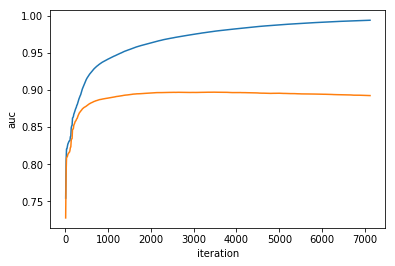

In [55]:
sns.lineplot(x="iteration", y="train_auc", data=log, palette=sns.color_palette("Set1", 1))
sns.lineplot(x="iteration", y="eval_auc", data=log, palette=sns.color_palette("Set1", 1))
plt.ylabel('auc')

In [69]:
df = pd.read_pickle(c.ROOTDIR / 'data/processed/raw_train.pkl')

In [70]:
df.shape

(590540, 434)

In [75]:
from pandas import dtypes
# LOAD TRAIN
X_train = pd.read_csv(c.ROOTDIR / 'data/raw/train_transaction.csv',index_col='TransactionID', dtype=dtypes, usecols=cols+['isFraud'])
train_id = pd.read_csv(c.ROOTDIR / 'data/raw/train_identity.csv',index_col='TransactionID', dtype=dtypes)
X_train = X_train.merge(train_id, how='left', left_index=True, right_index=True)
# LOAD TEST
X_test = pd.read_csv(c.ROOTDIR / 'data/raw/test_transaction.csv',index_col='TransactionID', dtype=dtypes, usecols=cols)
test_id = pd.read_csv(c.ROOTDIR / 'data/raw/test_identity.csv',index_col='TransactionID', dtype=dtypes)
X_test = X_test.merge(test_id, how='left', left_index=True, right_index=True)
# TARGET
y_train = X_train['isFraud'].copy()
del train_id, test_id, X_train['isFraud']; x = gc.collect()
# PRINT STATUS
print('Train shape',X_train.shape,'test shape',X_test.shape)

ImportError: cannot import name 'dtypes'